<a href="https://www.kaggle.com/code/mandeepsinghsaluja01/summerolympics-eda?scriptVersionId=119441373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Summer Olympics - Exploratory Data Analysis

![Summer-Olympics](https://media.giphy.com/media/vTsE2bda1LmLK/giphy.gif)


Heyy there! Thanks for viewing my Kernel!

Today, I will perform exploratory data analysis on Summer Olympics from Athens 1896 to Rio 2016 and figure out some useful patterns out of the data.

**If you have a question or feedback, do not hesitate to write and if you like this kernel, please do not forget to UPVOTE** 🙂

# Table of Contents

* [Introduction](#section-zero)
* [Importing Libraries](#section-one)
* [Reading and Understanding the Data](#section-two)
* [Data Prepartion](#section-three)
* [Data Cleaning](#section-four)
* [Exploratory Data Analysis](#section-five)
  - [Summer Olympics Medal Tally](#subsection-zero)
  - [Gold Medals Over Time](#subsection-one)
  - [Statistical Summary](#subsection-two)
  - [Top Athletes](#subsection-three)
  - [Cities Olympics was hosted](#subsection-four)
  - [Nations, Events, Athletes Over time](#subsection-five)
  - [Number of Events in a sport over the years](#subsection-six)
  - [Sex Distribution Over Time](#subsection-seven)
  - [Weight, Height relation to Gold Medal for Tennis](#subsection-eight)
  - [Age Distribution For Winning Medal](#subsection-nine)
  - [India at Olympics](#subsection-ten)
* [Conclusion](#section-six)

<a id="section-zero"></a>
# Introduction 

The Olympics is the leading international sporting events in which thousands of athletes around the world participate in a variety of competitions and is held every four years.


![Olympics-Logo](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Olympic_rings_without_rims.svg/1200px-Olympic_rings_without_rims.svg.png)


The interlocking rings of the Olympic flag was created by Baron Pierre de Coubertin, the co-founder of the modern Olympic games.  The five rings represented the five participating continents of the time: Africa, Asia, America, Europe, and Oceania

<a id="section-one"></a>
# Importing Libraraies

In [1]:
!pip install bar_chart_race
!pip install geopy
!pip install shapely 
!pip install folium --quiet
!pip install geopandas --quiet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objects as go
import plotly.figure_factory as ff
import bar_chart_race as bcr
import geopandas as gpd
import folium 
import matplotlib.pyplot as plt
import random
import json
from geopy.geocoders import Nominatim
from shapely.geometry import Point, LineString

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.8/156.8 kB 1.1 MB/s eta 0:00:00


/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning:

The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.



<a id="section-two"></a>
# Reading and Understanding the Data

In [2]:
noc_regions = pd.read_csv(
    "/kaggle/input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv"
)
athlete_events = pd.read_csv(
    "/kaggle/input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv"
)


In [3]:
noc_regions.head(5)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [4]:
noc_regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [5]:
noc_regions[noc_regions.region.isna()]

,NOC,region,notes
168,ROT,NaN,Refugee Olympic Team
208,TUV,NaN,Tuvalu
213,UNK,NaN,Unknown


Filling the null values of region with the respective value in notes column.

In [6]:
noc_regions.loc[noc_regions.region.isna(), "region"] = noc_regions.loc[
    noc_regions.region.isna(), "notes"
]

In [7]:
athlete_events.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


<a id="section-three"></a>
# Data Preparation
*  Data Filtering for Summer Olympics
*  Merging DataFrames athlete_events and noc_regions 

In [8]:
# Filtering only for Summer Olympics
athlete_events = athlete_events[athlete_events.Season == "Summer"]
# Merging athletes and noc_regions data
df = pd.merge(athlete_events, noc_regions, on="NOC", how="left")
df.rename(columns={"region": "Region"}, inplace=True)

In [9]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      222552 non-null  int64  
 1   Name    222552 non-null  object 
 2   Sex     222552 non-null  object 
 3   Age     213363 non-null  float64
 4   Height  170695 non-null  float64
 5   Weight  168698 non-null  float64
 6   Team    222552 non-null  object 
 7   NOC     222552 non-null  object 
 8   Games   222552 non-null  object 
 9   Year    222552 non-null  int64  
 10  Season  222552 non-null  object 
 11  City    222552 non-null  object 
 12  Sport   222552 non-null  object 
 13  Event   222552 non-null  object 
 14  Medal   34088 non-null   object 
 15  Region  222203 non-null  object 
 16  notes   4401 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.6+ MB


Columns with null values Age, Height, Weight, Medal ane Region

**Lets proceed with the cleaning stage!**

<a id="section-four"></a>
# Data Cleaning
* Removing duplicate rows.
* Finding the percentage of null values for each column.
* Analysing the empty data with a matrix.
* Replacing null values for Medal, Age, Weight, Height and Region columns

In [11]:
df.loc[df.duplicated()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
1066,704,Dsir Antoine Acket,M,27.0,NaN,NaN,Belgium,BEL,1932 Summer,1932,Summer,Los Angeles,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,Belgium,NaN
3772,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
3773,2449,William Truman Aldrich,M,48.0,NaN,NaN,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Painting, Drawings And ...",NaN,USA,NaN
4307,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Designs F...",NaN,Germany,NaN
4309,2777,Hermann Reinhard Alker,M,43.0,NaN,NaN,Germany,GER,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Architecture, Architect...",NaN,Germany,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221722,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK,NaN
221723,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Paintings",NaN,UK,NaN
221725,135072,Anna Katrina Zinkeisen (-Heseltine),F,46.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN
221727,135073,Doris Clare Zinkeisen (-Johnstone),F,49.0,NaN,NaN,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Unknown Event",NaN,UK,NaN


In [12]:
# keep=False even drops the original row that is why used first.
(df.drop_duplicates(keep="first", inplace=True))

In [13]:
# Calculating the Missing Values % contribution in DF

df_null = df.isna().mean().round(4) * 100

df_null.sort_values(ascending=False).head(10)

notes     98.01
Medal     84.59
Weight    23.74
Height    22.83
Age        4.08
Region     0.16
Season     0.00
Event      0.00
Sport      0.00
City       0.00
dtype: float64

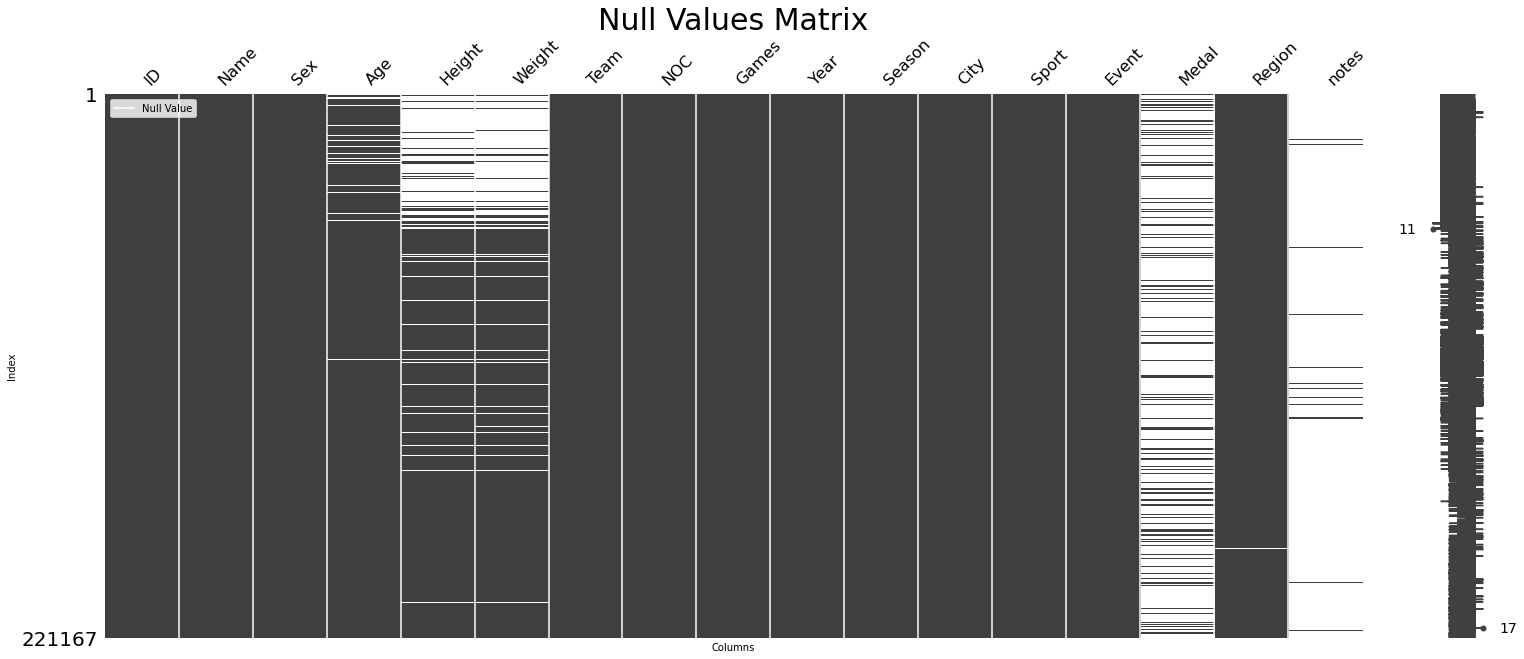

In [14]:
# Analysing null values on a matrix sorted by year.
msno.matrix(df.sort_values('Year'))
plt.title('Null Values Matrix',fontsize=30)
plt.ylabel("Index")
plt.xlabel("Columns")
plt.legend(['Null Value'],loc="upper left")
plt.show()

**Clearly, we see that the major portion of data for height and weight is missing for initial years of Olympics.**

In [15]:
df.Medal.unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

Here null values in Medal column means that the athlete didn't win a medal. Replacing with NoMedal.

In [16]:
df["Medal"].fillna("NoMedal", inplace=True)

In [17]:
df.head(20)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoMedal,Netherlands,NaN
5,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 4 x 100 metres Relay,NoMedal,Netherlands,NaN
6,10,"Einar Ferdinand ""Einari"" Aalto",M,26.0,NaN,NaN,Finland,FIN,1952 Summer,1952,Summer,Helsinki,Swimming,Swimming Men's 400 metres Freestyle,NoMedal,Finland,NaN
7,12,Jyri Tapani Aalto,M,31.0,172.0,70.0,Finland,FIN,2000 Summer,2000,Summer,Sydney,Badminton,Badminton Men's Singles,NoMedal,Finland,NaN
8,13,Minna Maarit Aalto,F,30.0,159.0,55.5,Finland,FIN,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Women's Windsurfer,NoMedal,Finland,NaN
9,13,Minna Maarit Aalto,F,34.0,159.0,55.5,Finland,FIN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Women's Windsurfer,NoMedal,Finland,NaN


Filling the null values for Age, Height, Weight on the basis of average of each of those per Event. As generally athlethes on the same event have these similar to each other.

In [18]:
df.Age = df.Age.fillna(df.groupby("Event")["Age"].transform("mean"))
df.Height = df.Height.fillna(df.groupby("Event")["Height"].transform("mean"))
df.Weight = df.Weight.fillna(df.groupby("Event")["Weight"].transform("mean"))
df.Age = np.floor(df.Age)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     221025 non-null  float64
 4   Height  219363 non-null  float64
 5   Weight  216785 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   221167 non-null  object 
 15  Region  220818 non-null  object 
 16  notes   4397 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.4+ MB


Still we have few null values, filling with the mean by sex.

In [20]:
df.Age = df.Age.fillna(df.groupby("Sex")["Age"].transform("mean"))
df.Height = df.Height.fillna(df.groupby("Sex")["Height"].transform("mean"))
df.Weight = df.Weight.fillna(df.groupby("Sex")["Weight"].transform("mean"))
df.Age = np.floor(df.Age)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     221167 non-null  float64
 4   Height  221167 non-null  float64
 5   Weight  221167 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   221167 non-null  object 
 15  Region  220818 non-null  object 
 16  notes   4397 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.4+ MB


We still have null values for Region. Lets dig a little deeper.

In [22]:
df[df.Region.isna()]

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,notes
509,332,Zarinah Abdullah,F,21.0,168.188406,60.9,Singapore,SGP,1992 Summer,1992,Summer,Barcelona,Badminton,Badminton Women's Singles,NoMedal,NaN,NaN
510,332,Zarinah Abdullah,F,25.0,168.188406,60.9,Singapore,SGP,1996 Summer,1996,Summer,Atlanta,Badminton,Badminton Women's Singles,NoMedal,NaN,NaN
2362,1515,Saiyidah Aisyah Mohamed Rafa'ee,F,28.0,173.000000,68.0,Singapore,SGP,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Single Sculls,NoMedal,NaN,NaN
6652,4264,Ang Peng Siong,M,21.0,180.000000,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 100 metres Freestyle,NoMedal,NaN,NaN
6653,4264,Ang Peng Siong,M,21.0,180.000000,75.0,Singapore,SGP,1984 Summer,1984,Summer,Los Angeles,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,NoMedal,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220770,134454,Zhang Guirong,F,26.0,182.000000,95.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Shot Put,NoMedal,NaN,NaN
220771,134454,Zhang Guirong,F,30.0,182.000000,95.0,Singapore,SGP,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Women's Shot Put,NoMedal,NaN,NaN
220972,134587,Zhang Xueling,F,21.0,163.000000,53.0,Singapore,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Singles,NoMedal,NaN,NaN
220973,134587,Zhang Xueling,F,21.0,163.000000,53.0,Singapore-1,SGP,2004 Summer,2004,Summer,Athina,Table Tennis,Table Tennis Women's Doubles,NoMedal,NaN,NaN


In [23]:
df[df.Region.isna()].NOC.nunique()

1

Lets fill the null values of region with Singapore, referring the NOC, 'SGP'

In [24]:
df.Region.fillna("Singapore", inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221167 entries, 0 to 222551
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      221167 non-null  int64  
 1   Name    221167 non-null  object 
 2   Sex     221167 non-null  object 
 3   Age     221167 non-null  float64
 4   Height  221167 non-null  float64
 5   Weight  221167 non-null  float64
 6   Team    221167 non-null  object 
 7   NOC     221167 non-null  object 
 8   Games   221167 non-null  object 
 9   Year    221167 non-null  int64  
 10  Season  221167 non-null  object 
 11  City    221167 non-null  object 
 12  Sport   221167 non-null  object 
 13  Event   221167 non-null  object 
 14  Medal   221167 non-null  object 
 15  Region  221167 non-null  object 
 16  notes   4397 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 30.4+ MB


In [26]:
df.drop(["ID", "notes"], axis=1, inplace=True)

*Pheww! Finally, Its time to explore and find out some patterns. :)*

<a id="section-five"></a>
# Exploratory Data Analysis


In [27]:
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,China
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,China
2,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,Denmark
3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,57.485390,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoMedal,Netherlands


<a id="subsection-zero"></a>
## Summer Olympics Medal Tally

Before calculating Medal Tally, we need to understand that each row represents whether an athlethe won a medal or not which means that for team events, just a sum of the Medals won't give us the right picture. For example, India in 1928 won Gold Medal in Hockey and this will be counted as 1 not 14 medals.

In [28]:
# India's Men Hockey Team in 1928.
df[
    (df.Region == "India") & (df.Event == "Hockey Men's Hockey") & (df.Year == 1928)
].head(14)

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region
4186,Shaukat Ali,M,30.0,176.852577,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
4460,Richard James Allen,M,25.0,172.000000,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
32103,Dhyan Chand Bais,M,22.0,169.000000,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
64140,Michael Anthony Gateley,M,23.0,176.852577,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
68522,"William James ""Willie"" Goodsir-Cullen",M,21.0,176.852577,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
74395,Leslie Charles Hammond,M,23.0,184.000000,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
96371,"Feroz-ud-Din ""Feroze"" Khan",M,23.0,176.852577,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
123521,George Eric McCarthy Marthins,M,22.0,176.852577,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
142578,"Richard Alexander ""Rex"" Norris",M,28.0,176.852577,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India
155720,Broome Eric Pinniger,M,25.0,180.000000,73.343761,India,IND,1928 Summer,1928,Summer,Amsterdam,Hockey,Hockey Men's Hockey,Gold,India


In [29]:
# Creating separate columns for medals
Medals_df = pd.get_dummies(df.Medal).drop("NoMedal", axis=1)
Medals_df.head()

,Bronze,Gold,Silver
0,0,0,0
1,0,0,0
2,0,0,0
3,0,1,0
4,0,0,0


In [30]:
# Concatenating horizonatlly both the dataframes
df = pd.concat([df, Medals_df], axis=1)
df.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Bronze,Gold,Silver
0,A Dijiang,M,24.0,180.000000,80.000000,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NoMedal,China,0,0,0
1,A Lamusi,M,23.0,170.000000,60.000000,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NoMedal,China,0,0,0
2,Gunnar Nielsen Aaby,M,24.0,177.480339,73.086644,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NoMedal,Denmark,0,0,0
3,Edgar Lindenau Aabye,M,34.0,182.480000,95.615385,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,0,1,0
4,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.000000,57.485390,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NoMedal,Netherlands,0,0,0


In [31]:
# To have a single row for team events
Medals_tally = df.drop_duplicates(subset=["NOC", "Games", "Event", "Medal"])

In [32]:
# Finding the sum of each medals for each NOC
Medals_tally = (
    Medals_tally.groupby(["NOC"])[["Gold", "Silver", "Bronze"]]
    .sum()
    .sort_values(["Gold", "Silver", "Bronze"], ascending=False)
    .reset_index()
)

In [33]:
# creating new column Total which is the total of medals won
Medals_tally['Total'] = Medals_tally.Gold + Medals_tally.Silver + Medals_tally.Bronze

In [34]:
Medals_tally.head()

,NOC,Gold,Silver,Bronze,Total
0,USA,1035.0,802.0,707.0,2544.0
1,URS,394.0,317.0,294.0,1005.0
2,GBR,278.0,316.0,298.0,892.0
3,GER,233.0,261.0,282.0,776.0
4,FRA,233.0,255.0,282.0,770.0


In [35]:
top_nocs = Medals_tally.head(10)
# Bar plot
fig = px.bar(
    top_nocs.sort_values(["Gold", "Silver", "Bronze"], ascending=True),
    y="NOC",
    x=["Gold", "Silver", "Bronze"],
    orientation="h",
    color_discrete_sequence=["#EECA4A", "#E2E2EE", "#8c561A"],
    title="Summer Olympics Medal Tally",
).update_layout(xaxis={"title": "Medal Count"}, legend={"title": "Medal"})
# to add the text of total medals for each noc
fig.add_trace(
    go.Scatter(
        y=top_nocs.sort_values(["Gold", "Silver", "Bronze"], ascending=True).NOC,
        x=top_nocs.sort_values(["Gold", "Silver", "Bronze"], ascending=True).Total,
        text=top_nocs.sort_values(["Gold", "Silver", "Bronze"], ascending=True).Total,
        mode="text",
        textposition="bottom right",
        textfont=dict(
            size=13,
        ),
        showlegend=False,
    )
)
fig.show()


Clearly, USA is way ahead compared to others.


<a id="subsection-one"></a>
# Gold Medals Over Time

In [36]:
# Gold medals won by each noc each year
gold_df = df.groupby(["Year", "NOC"])["Gold"].sum().to_frame().reset_index()

In [37]:
gold_df.head()

,Year,NOC,Gold
0,1896,AUS,2
1,1896,AUT,2
2,1896,DEN,1
3,1896,FRA,5
4,1896,GBR,3


In [38]:
# Changing the format of the data
rank_over_time = gold_df.pivot_table(values="Gold", index="Year", columns="NOC").fillna(
    0
)

In [39]:
rank_over_time

NOC,AFG,AHO,ALB,ALG,AND,ANG,ANT,ANZ,ARG,ARM,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
1928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [40]:
# Calculating cumulative sum for all columns to calculate the medals won with each year progressing
rank_over_time.iloc[:, 0:-1] = rank_over_time.iloc[:, 0:-1].cumsum()

In [41]:
rank_over_time.head()

NOC,AFG,AHO,ALB,ALG,AND,ANG,ANT,ANZ,ARG,ARM,...,VIE,VIN,VNM,WIF,YAR,YEM,YMD,YUG,ZAM,ZIM
Year,,,,,,,,,,,,,,,,,,,,,
1896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1906,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Keeping only the top 10 noc each year
top_noc = set()

for index, row in rank_over_time.iterrows():
    top_noc |= set(row[row > 0].sort_values(ascending=False).head(10).index)

rank_over_time = rank_over_time[top_noc]

In [43]:
rank_over_time.head()

NOC,ITA,USA,BEL,CAN,DEN,GRE,HUN,IND,AUS,SWE,GDR,CUB,FRA,GER,NOR,FIN,AUT,GBR,URS,SUI
Year,,,,,,,,,,,,,,,,,,,,
1896,0.0,11.0,0.0,0.0,1.0,10.0,2.0,0.0,2.0,0.0,0.0,0.0,5.0,25.0,0.0,0.0,2.0,3.0,0.0,1.0
1900,3.0,41.0,6.0,1.0,5.0,10.0,3.0,0.0,5.0,3.0,0.0,1.0,55.0,39.0,0.0,0.0,2.0,61.0,0.0,17.0
1904,3.0,169.0,6.0,28.0,5.0,11.0,5.0,0.0,5.0,3.0,0.0,6.0,55.0,43.0,2.0,0.0,4.0,62.0,0.0,18.0
1906,24.0,181.0,8.0,29.0,19.0,35.0,10.0,0.0,5.0,5.0,0.0,6.0,75.0,57.0,22.0,2.0,7.0,71.0,0.0,26.0
1908,26.0,215.0,9.0,43.0,19.0,35.0,17.0,0.0,5.0,53.0,0.0,6.0,87.0,61.0,29.0,3.0,7.0,218.0,0.0,26.0


In [44]:
# Plotting race bar chart to see Gold Medals over time
bcr.bar_chart_race(
    df=rank_over_time,
    n_bars=10,
    sort="desc",
    title="Country's Gold Medals Over Time",
    filename=None,
)

/opt/conda/lib/python3.7/site-packages/bar_chart_race/_make_chart.py:286: UserWarning:

FixedFormatter should only be used together with FixedLocator

/opt/conda/lib/python3.7/site-packages/bar_chart_race/_make_chart.py:287: UserWarning:

FixedFormatter should only be used together with FixedLocator



***Cool!***

<a id="subsection-two"></a>
## Statistical Summary

In [45]:
df.describe()

,Age,Height,Weight,Year,Bronze,Gold,Silver
count,221167.000000,221167.000000,221167.000000,221167.000000,221167.000000,221167.000000,221167.000000
mean,25.600524,175.575063,71.112289,1976.602486,0.051585,0.051798,0.050695
std,6.410085,10.242724,13.889655,30.820855,0.221189,0.221619,0.219374
min,10.000000,127.000000,25.000000,1896.000000,0.000000,0.000000,0.000000
25%,21.000000,168.000000,62.000000,1960.000000,0.000000,0.000000,0.000000
50%,24.000000,176.000000,70.500000,1984.000000,0.000000,0.000000,0.000000
75%,28.000000,182.025292,78.250482,2000.000000,0.000000,0.000000,0.000000
max,97.000000,226.000000,214.000000,2016.000000,1.000000,1.000000,1.000000


How come the maximum age is 97? Lets figure it out.

In [46]:
df[(df.Age==97)]

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Bronze,Gold,Silver
211066,John Quincy Adams Ward,M,97.0,178.351612,76.0,United States,USA,1928 Summer,1928,Summer,Amsterdam,Art Competitions,"Art Competitions Mixed Sculpturing, Statues",NoMedal,USA,0,0,0


Oh, Art was also part of this, I didn't know that. Lets see what all sports are there where senior citizens play.

In [47]:
df[df["Age"] >= 60]["Sport"].unique()

array(['Art Competitions', 'Shooting', 'Sailing', 'Equestrianism',
       'Fencing', 'Archery', 'Roque', 'Rowing'], dtype=object)

In [48]:
df.describe(include="object")

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal,Region
count,221167,221167,221167,221167,221167,221167,221167,221167,221167,221167,221167
unique,116122,2,1157,230,29,1,23,52,651,4,209
top,Heikki Ilmari Savolainen,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,NoMedal,USA
freq,39,161868,14277,14815,13821,221167,22297,38624,5733,187090,14815


* Number of: 
        Editions -> 28 (Instead of 29 as Olympics held in 1906 was not considered as Olympics as it was not following 4 year gap )
        Hosts    -> 23
        Sports   -> 52
        Events   -> 651
        Teams  -> 209  (Its more than the current number of countries as at that time, athletic geography was considered different from political geography)
        Athletes -> 116122
           

<a id="subsection-three"></a>
## Top Athletes

In [49]:
# To have the list of athletes
athlete_names = df.drop_duplicates(subset=["Name", "Sport", "Region"])[
    ["Name", "Sport", "Region"]
]

df["Total"] = df.Gold + df.Silver + df.Bronze

# athletes which won the most medals 
successful = (
    df.groupby("Name")[["Total"]]
    .sum()
    .sort_values("Total", ascending=False)
    .reset_index()
)

# Merging the above two dataframes
Top_athletes = (
    pd.merge(athlete_names, successful, on="Name", how="left")
    .sort_values("Total", ascending=False)
    .reset_index()
    .drop("index", axis=1)
)


In [50]:
Top_athletes.head(10)

,Name,Sport,Region,Total
0,"Michael Fred Phelps, II",Swimming,USA,28
1,Larysa Semenivna Latynina (Diriy-),Gymnastics,Russia,18
2,Nikolay Yefimovich Andrianov,Gymnastics,Russia,15
3,Edoardo Mangiarotti,Fencing,Italy,13
4,Takashi Ono,Judo,Japan,13
5,Takashi Ono,Gymnastics,Japan,13
6,Borys Anfiyanovych Shakhlin,Gymnastics,Russia,13
7,Birgit Fischer-Schmidt,Canoeing,Germany,12
8,Aleksey Yuryevich Nemov,Gymnastics,Russia,12
9,Sawao Kato,Gymnastics,Japan,12


<a id="subsection-four"></a>
# Cities Olympics was hosted


In [51]:
cities=list(df.City.unique())

In [52]:
# function that will return the coordinates of every city from out city_list
def get_coordinates(city_list):
    geolocator = Nominatim(user_agent="location")
    dictionary = {}

    for city in city_list:
        location = geolocator.geocode(city) # to get the cordinates of the city
        coordinate_values = (location.longitude, location.latitude)
        # saving in a dictionary with key as city and value as longitude and latitude
        dictionary[city] = coordinate_values 

    return dictionary  # finally returns the dictionary


In [53]:
cities_dict = get_coordinates(cities)

In [54]:
cities = pd.DataFrame(cities_dict)

In [55]:
cities.head()

,Barcelona,London,Antwerpen,Paris,Los Angeles,Helsinki,Sydney,Atlanta,Stockholm,Beijing,...,Munich,Seoul,Berlin,Melbourne,Roma,Amsterdam,Montreal,Moskva,Tokyo,St. Louis
0,2.177432,-0.127650,4.399708,2.320041,-118.242766,24.942747,151.208285,-84.390264,18.071093,116.391276,...,11.575382,126.978291,13.388860,144.963161,12.482932,4.892453,-73.569806,37.617494,139.757653,-90.191015
1,41.382894,51.507336,51.221110,48.858890,34.053691,60.167488,-33.869844,33.748992,59.325117,39.906217,...,48.137108,37.566679,52.517037,-37.814218,41.893320,52.373080,45.503182,55.750446,35.681266,38.628028


In [56]:
# Transposing dataframe and renaming columns
cities = (
    cities
    .T.reset_index()
    .rename(columns={"index": "City", 0: "longitude", 1: "latitude"})
)


In [57]:
cities.head()

,City,longitude,latitude
0,Barcelona,2.177432,41.382894
1,London,-0.127650,51.507336
2,Antwerpen,4.399708,51.221110
3,Paris,2.320041,48.858890
4,Los Angeles,-118.242766,34.053691


In [58]:
# plotting the cities on map using folium
map = folium.Map(
    location=[20, 0], tiles="OpenStreetMap", zoom_start=2, control_scale=True
)
for i in range(0, len(cities)):
    folium.Marker(
        location=[cities.iloc[i]["latitude"], cities.iloc[i]["longitude"]],
        popup=cities.iloc[i]["City"],
    ).add_to(map)


In [59]:
map

<a id="subsection-five"></a>
## Nations, Events, Athletes Over Time

In [60]:
# Number of nations participating over time
participating_nations = (
    df.drop_duplicates(["Year", "Region"])[["Year"]]
    .value_counts()
    .reset_index()
    .sort_values("Year")
)
participating_nations.rename(columns={0: "Nations"}, inplace=True)

# Number of Events over time
event_over_years = (
    df.drop_duplicates(["Year", "Event"])[["Year"]]
    .value_counts()
    .reset_index()
    .sort_values("Year")
)
event_over_years.rename(columns={0: "Events"}, inplace=True)

#Number of athletes participating over time 
atheletes_over_time = (
    df.drop_duplicates(["Year", "Name"])[["Year"]]
    .value_counts()
    .reset_index()
    .sort_values("Year")
)
atheletes_over_time.rename(columns={0: "Athletes"}, inplace=True)


<AxesSubplot:xlabel='Year', ylabel='Athletes'>

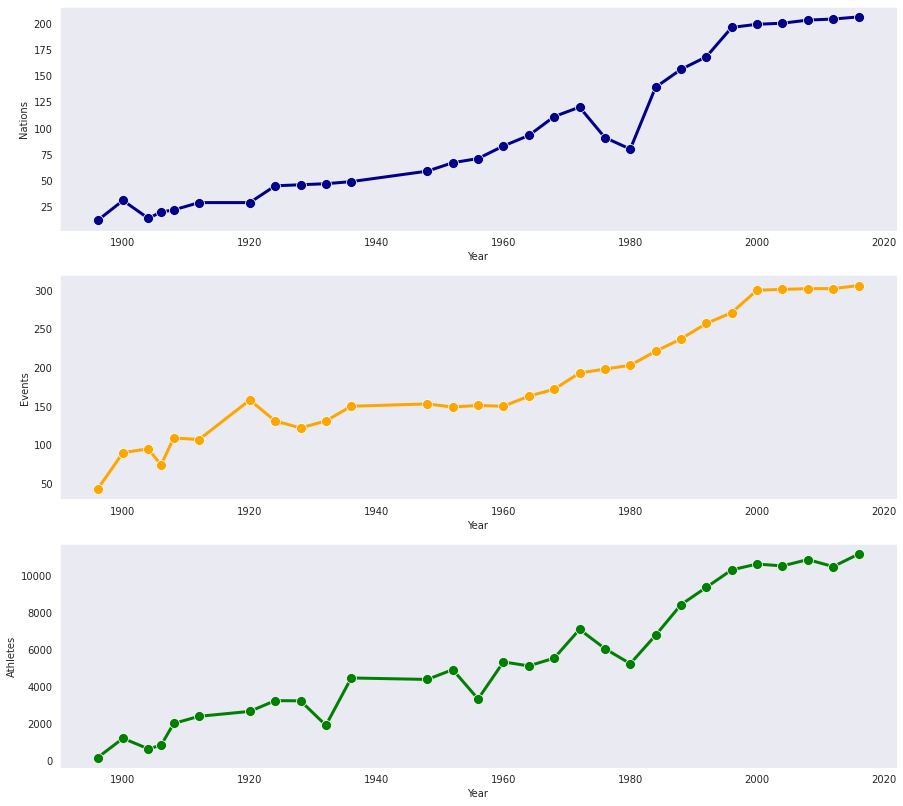

In [61]:
# Plotting the three dataframes above
sns.set_style("darkgrid", {"axes.grid": False})
fig, ax = plt.subplots(figsize=(15, 14))
plt.subplot(3, 1, 1)
sns.lineplot(
    x=participating_nations.Year,
    y=participating_nations.Nations,
    marker="o",
    markerfacecolor="darkblue",
    markersize=10,
    color="darkblue",
    linewidth=3,
)

plt.subplot(3, 1, 2)
sns.lineplot(
    x=event_over_years.Year,
    y=event_over_years.Events,
    marker="o",
    markerfacecolor="orange",
    markersize=10,
    color="orange",
    linewidth=3,
)

plt.subplot(3, 1, 3)
sns.lineplot(
    x=atheletes_over_time.Year,
    y=atheletes_over_time.Athletes,
    marker="o",
    markerfacecolor="green",
    markersize=10,
    color="green",
    linewidth=3,
)

Clearly,the number of participating nations decreased majorly in the interval 1972-1980 as the nations boycotted the Olympics in response to the Soviet invasion of Afghanistan

<a id="subsection-six"></a>
## Number of Events in a sport over the years

In [62]:
# To have unique set of Year, Sport and Events.
temp_df = df.drop_duplicates(["Year", "Sport", "Event"])
# Formatting data so that we can plot as heat map and filling null values with 0
hmap = (
    temp_df.pivot_table(index="Sport", columns="Year", values="Event", aggfunc="count")
    .fillna(0)
    .astype(int)
)


<AxesSubplot:title={'center':'Number of Events in a sport over the years'}, xlabel='Year', ylabel='Sport'>

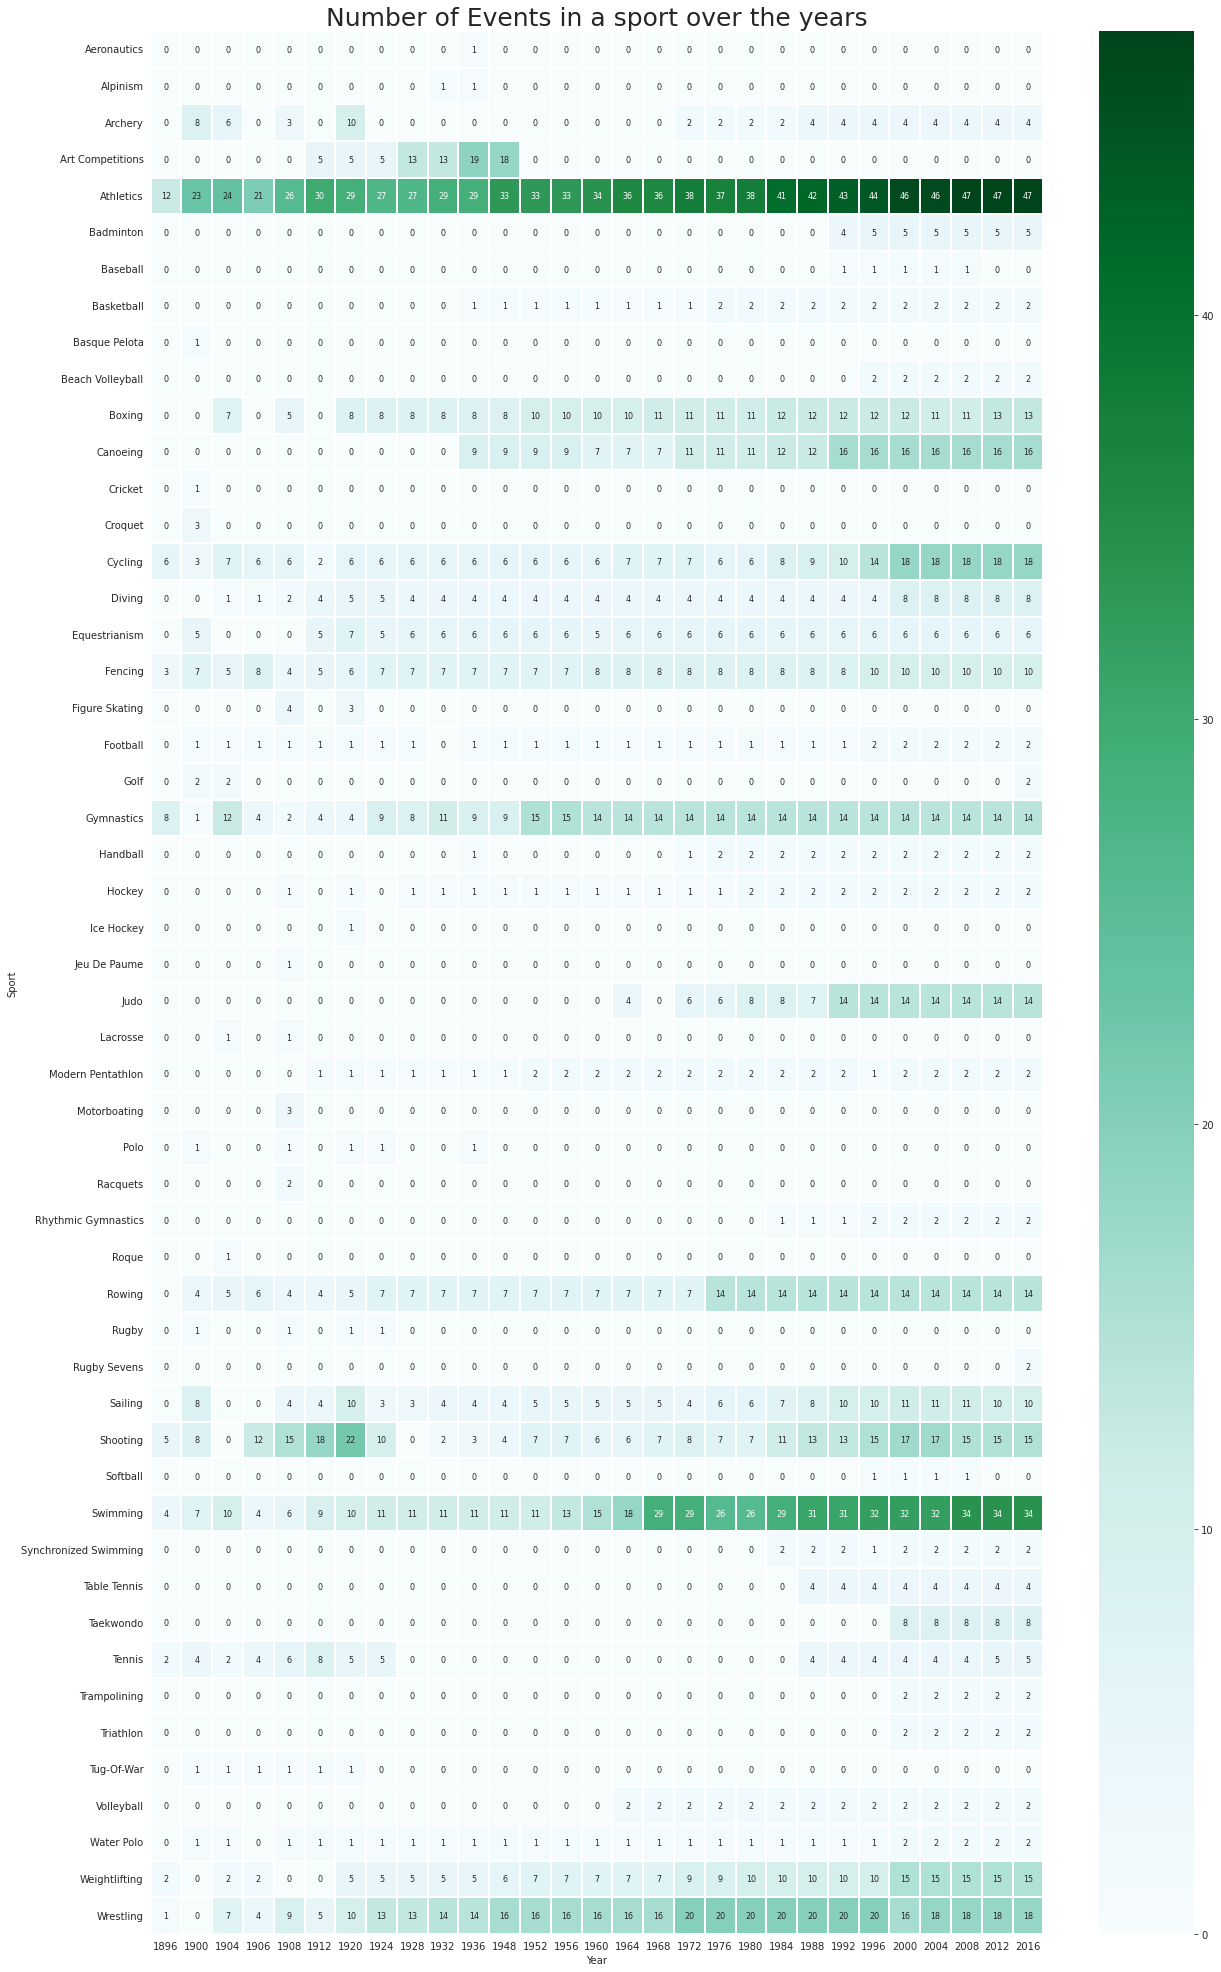

In [63]:
plt.figure(figsize=(20, 35))
plt.title("Number of Events in a sport over the years", fontsize=25)

# Plotting the heatmap 
sns.heatmap(
    hmap, linewidths=0.25, cmap="BuGn", linecolor="w", annot=True, annot_kws={"size": 8}
)


Key Insights:
- Athlethics has the highest number of events till date.
- In 1936 even aeronautics was part of Olympics.
- Surprisingly, Art was also part of few Olympics but was discontinued later on.
- Golf and Rugby Sevens has been continued again from 2016 Olympics.
- Tug of War, Softball, Rugby, Roque, Racquets, Motorboating all discontinued.

<a id="subsection-seven"></a>
## Sex Distribution Over Time
![Women](https://i.ytimg.com/vi/lOzfbXAxshg/maxresdefault.jpg)

In [64]:
# Calculating number of Males and Females participating each year
Sex_distribution = df.groupby(["Year", "Sex"])[["Name"]].count().reset_index()
Sex_distribution.Year = Sex_distribution.Year.astype("str")

# To find the total athletes participating each year.
total_athletes = Sex_distribution.groupby("Year")[["Name"]].sum().reset_index()

In [65]:
# Plotting the distribution as a bar plot
fig = px.bar(
    Sex_distribution.sort_values("Year", ascending=False),
    y="Year",
    x="Name",
    color="Sex",
    orientation="h",
)
fig.update_layout(
    autosize=False,
    width=1200,
    height=800,
)
# to add total number of athlethes as text on the plots.
fig.add_trace(
    go.Scatter(
        y=total_athletes.sort_values("Year", ascending=True).Year,
        x=total_athletes.sort_values("Year", ascending=True).Name,
        text=total_athletes.sort_values("Year", ascending=True).Name,
        mode="text",
        textposition="bottom right",
        textfont=dict(
            size=10,
        ),
        showlegend=False,
    )
)

fig.show()


Sex Distribution:
- Over the years the athletes incnreased from around 400 to 14k. 
- In the first olympics no women participated because  At the time, the founder 
of the IOC, Baron Pierre de Coubertin, argued an Olympics 
with women would be “impractical, uninteresting, unaesthetic and indecent. :( 
- I am so happy to see that now, the sex distribution is almost 50-50 for both
male and female.

<a id="subsection-eight"></a>
# Weight, Height relation to Gold Medal for Tennis

![Djoko](https://www.sportico.com/wp-content/uploads/2022/11/GettyImages-1244940647-e1668980882773.jpg?w=1280&h=720&crop=1)

In [66]:
# Male Tennis Players 
male_df = df[
    (df.Sex == "M")
    & (df.Sport == "Tennis")
    & ((df.Medal == "Gold") | (df.Medal == "NoMedal"))
]
# Female Tennis Players
female_df = df[
    (df.Sex == "F")
    & (df.Sport == "Tennis")
    & ((df.Medal == "Gold") | (df.Medal == "NoMedal"))
]


<AxesSubplot:xlabel='Weight', ylabel='Height'>

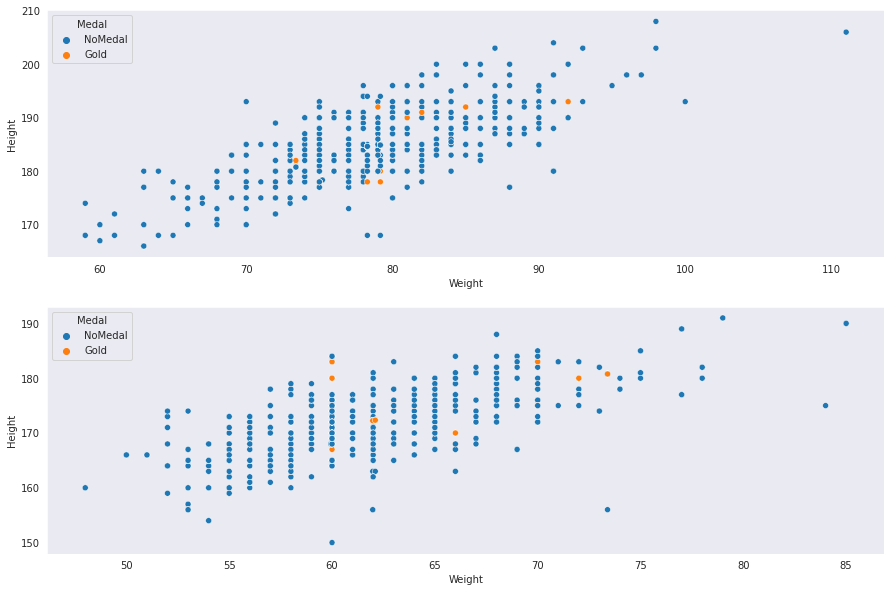

In [67]:
# Plotting for both male and female tennis players 
plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
sns.scatterplot(y=male_df.Height, x=male_df.Weight, hue=male_df.Medal)

plt.subplot(2, 1, 2)
sns.scatterplot(y=female_df.Height, x=female_df.Weight, hue=female_df.Medal)


<a id="subsection-nine"></a>
## Age Distribution For Winning Medal

In [68]:
athlete_df = df.drop_duplicates(subset=["Name", "Age"])
a1 = athlete_df["Age"]
a2 = athlete_df[athlete_df.Medal == "Gold"]["Age"]
a3 = athlete_df[athlete_df.Medal == "Silver"]["Age"]
a4 = athlete_df[athlete_df.Medal == "Bronze"]["Age"]
fig = ff.create_distplot(
    [a1, a2, a3, a4],
    ["Overall Analysis", "Gold Medalist", "Silver", "Bronze"],
    show_hist=False,
    show_rug=False,
)
fig.show()


Age Distribution
- The probability of winning a Gold Medal is more
 compared to silver in between the age of
20-25.


<a id="subsection-ten"></a>
# India At Olympics

![India](https://thesportsschool.com/wp-content/uploads/2021/08/olympics-india-generic.jpg)

In [69]:
# filtering for india
india = df[df.Region == "India"]

In [70]:
india.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Bronze,Gold,Silver,Total
436,S. Abdul Hamid,M,24.0,185.112656,77.337324,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 110 metres Hurdles,NoMedal,India,0,0,0,0
437,S. Abdul Hamid,M,24.0,182.349788,73.704416,India,IND,1928 Summer,1928,Summer,Amsterdam,Athletics,Athletics Men's 400 metres Hurdles,NoMedal,India,0,0,0,0
790,Shiny Kurisingal Abraham-Wilson,F,19.0,167.000000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 800 metres,NoMedal,India,0,0,0,0
791,Shiny Kurisingal Abraham-Wilson,F,19.0,167.000000,53.000000,India,IND,1984 Summer,1984,Summer,Los Angeles,Athletics,Athletics Women's 4 x 400 metres Relay,NoMedal,India,0,0,0,0
792,Shiny Kurisingal Abraham-Wilson,F,23.0,167.000000,53.000000,India,IND,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 800 metres,NoMedal,India,0,0,0,0


### On what sports India won the most medals

In [71]:
sports_india = india.drop_duplicates(["Sport", "Games", "Event"])

sports_india.groupby("Sport")[["Gold", "Silver", "Bronze"]].sum().sort_values(
    ["Gold", "Silver", "Bronze"], ascending=False
).head(8)


,Gold,Silver,Bronze
Sport,,,
Hockey,8,1,2
Shooting,1,2,0
Athletics,0,2,0
Wrestling,0,1,4
Boxing,0,0,2
Badminton,0,0,1
Tennis,0,0,1
Weightlifting,0,0,1


### Top Athletes of India

In [72]:
# To have unique set of Names
athlete_names = india.drop_duplicates(subset=["Name", "Sport", "Region"])[
    ["Name", "Sport", "Region"]
]
# India's Top Athlete
successful = (
    india.groupby("Name")[["Gold", "Silver", "Bronze", "Total"]]
    .sum()
    .sort_values("Gold", ascending=False)
    .reset_index()
)

# Merging the above dataframes
athlete_india = (
    pd.merge(athlete_names, successful, on="Name", how="left")
    .sort_values("Gold", ascending=False)
    .reset_index()
    .drop("index", axis=1)
)


In [73]:
athlete_india.head(20)

,Name,Sport,Region,Gold,Silver,Bronze,Total
0,Dhyan Chand Bais,Hockey,India,3,0,0,3
1,Udham Singh Kular,Hockey,India,3,1,0,4
2,Randhir Singh Gentle,Hockey,India,3,0,0,3
3,Leslie Walter Claudius,Hockey,India,3,1,0,4
4,"Balbir Singh Dosanjh, Sr.",Hockey,India,3,0,0,3
5,Richard James Allen,Hockey,India,3,0,0,3
6,Ranganathan Francis,Hockey,India,3,0,0,3
7,Shankar Pillay Laxman,Hockey,India,2,1,0,3
8,Carlyle Carrol Tapsell,Hockey,India,2,0,0,2
9,Leslie Charles Hammond,Hockey,India,2,0,0,2


<a id="section-six"></a>
# Conclusion

Using various techniques and tools now we have come to the end of the analysis with solid inferences. There is still room for improvement and we can use more advanced tools and techniques to fetch more insights out of this. I will continue to work on this and keep on updating this notebook. 

***
**Thank you for your time!
If you like my work, please leave an upvote. It will keep me motivated in offering more content to the Kaglle Community!:)**
***
If you have any doubts, feel free to comment! :)

![Thank-You](https://media3.giphy.com/media/3oEdva9BUHPIs2SkGk/giphy.gif?cid=ecf05e47d09f4iwnxslr0ypylsdvjo5wg6ps8ied9lm3uvwm&rid=giphy.gif&ct=g)